# Assignment I  ---------- SENTIMENT ANALYSIS

### Name : Karthik Raja Kalaiselvi Bhaskar

### Student Number: 1004527283

Importing the Necessary Libraries for our Machine Learning model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import sys
import random
import html
%matplotlib inline
import matplotlib.pyplot as plt


## Reading Classified and Unclassified Data into our workspace

In [2]:
#Reading the Classified tweets
# Since we are reading a text file I am using encoding parameter in the open method
classifiled = open('classified_tweets.txt', 'r', encoding="utf8")        
data = classifiled.read()   #Read Every Charater till the End of the Line

# Checking Wheather we have empty line or not, If so we are going to remove
#splitlines()  will return a list with all lines as String
#strip() will return a copy of the string in which all the charactes have been stripped from the beginning and the end of the string
classified_data = [i for i in data.splitlines() if i.strip()!='']
classified_data

['"class","id","date","query","user","text"',
 '"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D"',
 '"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can\'t update his Facebook by texting it... and might cry as a result  School today also. Blah!"',
 '"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds"',
 '"0","1467811184","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","ElleCTF","my whole body feels itchy and like its on fire "',
 '"0","1467811193","Mon Apr 06 22:19:57 PDT 2009","NO_QUERY","Karoli","@nationwideclass no, it\'s not behaving at all. i\'m mad. why am i here? because I can\'t see you all over there. "',
 '"0","1467811372","Mon Apr 06 22:20:00 PDT 2009","NO_QUERY","joy_wolf","@Kwesidei

In [3]:
#Reading the UnClassified tweets
# Since we are reading a text file I am using encoding parameter in the open method
unclassifiled = open('unclassified_tweets.txt', 'r', encoding="utf8")        
data1 = unclassifiled.read()   #Read Every Charater till the End of the Line

# Checking Wheather we have empty line or not, If so we are going to remove
#splitlines()  will return a list with all lines as String
#strip() will return a copy of the string in which all the charactes have been stripped from 
#the beginning and the end of the string
unclassified_data = [i for i in data1.splitlines() if i.strip()!='']
unclassified_data

['\ufeffliving the dream. #cameraman #camera #cameraception #camera #cameras #marriott #feet #tommulcair… instagram.com/p/8up9qepkxw/\xa0',
 "justin #trudeau's reasons for thanksgiving. today's montreal@themoment blog at bit.ly/1jqkfwr\xa0 #elxn42 poll #quebec #montreal",
 '@themadape   butt…..butt…..we’re allergic to latex! makes us sneeze this in #nbpoli #cdnpoli pic.twitter.com/ta0llla4jk',
 '2 massive explosions at peace march in #turkey. 30 killed. turkey continues to implode in violence. #cdnpoli twitter.com/telegraph/status/652800836720922624\xa0…',
 '#mulcair suggests there’s bad blood between him and #trudeau worldwideherald.com/bammt\xa0 #ready4change #ndp pic.twitter.com/zgxmwo2gjk',
 '#polqc on se sort de la marde avec #harper et prêt à y retourner avec #trudeau? #polcan',
 "harper gave $8m to help other countries' get right wing govt's elected.  boingboing.net/2015/10/09/canadian-tories-funneled-8m-i.html\xa0… #cdnpoli #elxn42 @pnpcbc @cbcnews",
 'tommy taylor added,',
 '@

## 1. Data Cleaning

In [4]:
# Define a function to remove all the stop words from the tweet

def removal_of_stop_words(tw):
    #Reading Stop_words text file given in the assingment 
    #split gives a list, in which each word is a string
    stopwords = open('stop_words.txt', 'r').read().split()     
    
    tw = tw.split()                     
      # " ".join return a string which is the concatination of the strings which are not in the stop words 
      # and the sepeartor between the elements is white space (" ")
    
    nostop = " ".join(w for w in tw if not w in stopwords)     
    
    return nostop

# Example to test the function    
Example3 = removal_of_stop_words("very excited to help @yswahmed with #goknockdoors our next  mp of @liberal_party #realchange #teamtrudeau @lpc_o pic.twitter.com/bllw8bkybr")
print (Example3)

excited help @yswahmed #goknockdoors mp @liberal_party #realchange #teamtrudeau @lpc_o pic.twitter.com/bllw8bkybr


In [5]:
#The given tweets are not good for data analysis , we need to clean the tweets for making the analysis easier

def data_cleaning(tweets):
    #Using Regular expression to Clean out tweets
    
    #All html tags and attributes (i.e., /<[^>]+>/) are removed.
    tweets = removehtmltags(tweets)
    
    # Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
    #Convert all named and numeric character references (e.g. &gt;, &#62;, &x3e;) in the strings 
    #to the corresponding unicode characters
    
    tweets = html.unescape(tweets)
    
    # Remove URLs
    url = re.sub(r"http\S+", "", tweets)
    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(twitter.[^\s])|(instagram.[^\s])|(bit.[^\s])|(pic.[^\s]))','', url)
    
    
    # Remove extra white spaces
    tweets = re.sub('[\s]+', " ", tweets)
    
    # Keep only letters
    tweets = re.sub("[^a-zA-Z]", " ", tweets)
    
    # Convert to lowercase.
    tweets = tweets.lower()
    
    # Remove stopwords
    tweets = removal_of_stop_words(tweets)
    
    # tokenize the tweet
    tokens = tweets.split()

    return tokens


#All html tags and attributes (i.e., /<[^>]+>/) are removed.
def removehtmltags(text):
    tags = re.compile(r'<.*?>')
    return tags.sub('', text)


#Example to test the function
#Example1 = "en <>rappel pour le /plaisir... #trudeau+ #elxn42 #polcan #polqc pic.twitter.com/ppmg9ccfhq"
#tag = removehtmltags(Example1)
#tag

# Example to test the function
Example2 = "dear fake liberals, this is why the world thinks you are IDIOTS. don't be like this guy. be a true #liberal. twitter.com/timmbarton123/status/653363276349222913 …"
random_tweet = data_cleaning(Example2)
random_tweet



['dear',
 'fake',
 'liberals',
 'thinks',
 'idiots',
 'don',
 'guy',
 'true',
 'liberal',
 'om',
 'timmbarton',
 'status']

##### Cleaning the Unclassified data using the method created above:

In [6]:
for tweets in unclassified_data:
    print (data_cleaning(tweets))

['living', 'dream', 'cameraman', 'camera', 'cameraception', 'camera', 'cameras', 'marriott', 'feet', 'tommulcair', 'om', 'qepkxw']
['justin', 'trudeau', 'reasons', 'thanksgiving', 'today', 'montreal', 'themoment', 'blog', 'jqkfwr', 'elxn', 'poll', 'quebec', 'montreal']
['themadape', 'butt', 'butt', 'allergic', 'latex', 'sneeze', 'nbpoli', 'cdnpoli', 'witter', 'ta', 'llla', 'jk']
['massive', 'explosions', 'peace', 'march', 'turkey', 'killed', 'turkey', 'continues', 'implode', 'violence', 'cdnpoli', 'om', 'telegraph', 'status']
['mulcair', 'suggests', 'bad', 'blood', 'trudeau', 'worldwideherald', 'bammt', 'ready', 'change', 'ndp', 'witter', 'zgxmwo', 'gjk']
['polqc', 'se', 'sort', 'de', 'la', 'marde', 'avec', 'harper', 'pr', 'retourner', 'avec', 'trudeau', 'polcan']
['harper', 'help', 'countries', 'wing', 'govt', 'elected', 'boingboing', 'net', 'canadian', 'tories', 'funneled', 'html', 'cdnpoli', 'elxn', 'pnpcbc', 'cbcnews']
['tommy', 'taylor']
['justintrudeau', 'thomasmulcair']
['tracy'

['ilzy', 'niqab', 'dog', 'whistle', 'politics', 'kind', 'cdnpoli']
['pls', 'votetogether', 'defeat', 'harper', 'move', 'canada', 'forward', 'join', 'votetogether', 'elxn', 'cdnpoli', 'leadnowca']
['justin', 'trudeau', 'smacked', 'excuse', 'vote', 'cdnpoli', 'huffingtonpost', 'justin', 'trudeau', 'voting', 'html', 'huffpostcanada']
['great', 'welcoming', 'realchange', 'bus', 'justintrudeau', 'davenport', 'elexn', 'cdnpoli', 'teamtrudeau', 'lpc', 'om', 'torsunphoto', 'status']
['elections']
['ndp', 'legislation', 'hike', 'corporate', 'taxes', 'mulcair', 'worldwideherald', 'whlix', 'cdnpoli', 'elxn', 'witter', 'twfwqbgwob']
['justintrudeau', 'liberal', 'party', 'criminal', 'smoke', 'marijuana', 'realchange', 'hedyfry', 'logical', 'witter', 'sjumyewpht']
['weeks', 'campaign', 'change', 'tim', 'harper', 'worldwideherald', 'rink', 'roft', 'cdnpoli', 'witter', 'hbvr']
['mfs', 'bluegood', 'allnews', 'nite', 'love', 'hear', 'answer', 'question', 'lpc', 'news', 'chines', 'fundraising', 'team', '

['remember', 'mulroney', 'pc', 'seats', 'happen', 'anyonebutharper', 'cdnpoli', 'votestrategically']
['elizabethmay', 'justintrudeau', 'stephenharper', 'thomasmulcair']
['happy', 'thanksgiving', 'weekend', 'elxn', 'cdnpoli', 'witter', 'xjor', 'nlv']
['dear', 'canada', 'harper', 'cpc', 'gov', 'sells', 'billions', 'weapons', 'saud', 'arabia', 'arabia', 'going', 'legally', 'crucify', 'kid', 'elxn', 'elxn']
['advance', 'polls', 'perth', 'wellington', 'ethanrabidoux', 'ndp', 'advance', 'polls', 'ndp', 'hq', 'tm', 'pm', 'ready', 'change', 'elxn', 'cdnpoli', 'ndp', 'om', 'ndp', 'hq', 'status']
['ereg', 'elections', 'cwelcome', 'aspx']
['trudeau', 'bien', 'fendu', 'ses', 'propositions', 'sur', 'la', 'marijuana', 'surtout', 'il', 'gage', 'une', 'confiance', 'est', 'payant', 'politiquement', 'tlmep', 'politique']
['universenme', 'peter']
['kaimatai', 'jeez', 'cocksucker', 'liberal', 'hypocrite', 'disloyal', 'ur', 'brethren', 'islamists', 'kills', 'homosexuals']
['takebackourcountry', 'elxn', 'cd

['volatility', 'quebec', 'rare', 'sign', 'vote', 'shared', 'three', 'parties', 'ift', 'tt', 'oqe', 'wl', 'cdnpoli', 'canpoli']
['nbcnews', 'vhwzis']
['om', 'nytimes', 'status']
['joel', 'klebanoff', 'retweeted', 'ctv', 'toronto']
['pnpcbc', 'election', 'elxn', 'cdnpoli', 'polcan', 'fed', 'polqc', 'cbcnews', 'opserenashim', 'turkey', 'blames', 'proxy', 'isis', 'om', 'michaellee', 'status']
['nationalpost', 'avalon', 'thing', 'harper', 'bombs', 'dropped', 'syrians', 'doesn', 'discriminate', 'cdnpoli', 'elxn', 'nlpoli']
['crime', 'city', 'retweeted', 'hours', 'vancouver']
['full', 'text', 'rosemary', 'barton', 'interview', 'tom', 'mulcair', 'cbc', 'mulcair', 'dragplus', 'post']
['talking', 'turkey', 'thanksgiving', 'weekend', 'numbers', 'behindthenumbers', 'talking', 'turkey', 'thanksgiving', 'weekend', 'elxn', 'cdnpoli', 'stopharper', 'savecanada']
['chris', 'robinson']
['brendanmilesyyc', 'trustworthy', 'hardest', 'working', 'candidate', 'yycheritage', 'voted', 'realchange', 'witter', '

['jonathan', 'robinson']
['emmay', 'mah']
['ken', 'cox', 'retweeted', 'ric', 'grenier']
['alex', 'scotian', 'totally', 'respect', 'choice', 'hope', 'progressives', 'increased', 'seats', 'helps', 'cdnpoli', 'elxn', 'lpc', 'ndp']
['monica', 'henry']
['tor', 'ont', 'rt', 'torybluest', 'justin', 'trudeau', 'imagine', 'meeting', 'cdnpoli', 'elxn', 'nlpoli', 'nspoli', 'peipoli', 'om', 'tor', 'ont', 'status']
['decide', 'watch', 'democraticdebate', 'worth', 'migraine', 'conservative', 'republican', 'tcot', 'ycot']
['international', 'group', 'sends', 'team', 'ottawa', 'monitor', 'election', 'impact', 'fair', 'elections', 'embassynews', 'news', 'osce', 'impact', 'fair', 'elections', 'canadian', 'election', 'vhr', 'vcwdg', 'elxn', 'cdnpoli']
['oct', 'bcgreens', 'jump', 'nanospoll']
['snl', 'actress', 'victoriajackson', 'banished', 'anniversary', 'conservative', 'pjnet', 'ccot', 'tcot', 'benybs', 'blogspot', 'snl', 'actress', 'victoriajackson', 'html']
['novascotians', 'refused', 'grants', 'busin

['watch', 'live', 'ndp', 'leader', 'tommulcair', 'speak', 'rally', 'courtenay']
['voted', 'elxn', 'today', 'thankful', 'ability', 'vote', 'gift', 'functioning', 'democracy', 'cdnpoli', 'votetogether']
['youtube', 'watch', 'iunm', 'ghc']
['today', 'final', 'day', 'vote', 'realchange', 'advance', 'polls', 'elections', 'content', 'aspx', 'vote', 'document', 'lang', 'advance', 'seamusoregan', 'votewhalen', 'mcdonald', 'avalon']
['wakeupcanada', 'trudeau', 'mulcair', 'crazieness', 'elxn', 'cdnpoli', 'polqc', 'chevymo', 'banks', 'todd', 'om', 'tarekfatah', 'status']
['thomasmulcair', 'rachelnotley', 'premierofficeab', 'ready', 'change', 'elxn', 'cdnpoli', 'witter', 'hc', 'swxtpw']
['clearly', 'frankly', 'weapons', 'mass', 'distraction', 'political', 'parties', 'leaders', 'evil', 'system', 'cdnpoli']
['proofreaders', 'needed', 'mulcair', 'elxn', 'witter', 'hkp', 'asvo']
['tom', 'moffatt', 'retweeted', 'armine', 'yalnizyan']
['brian', 'wattz']
['oshawa', 'race', 'mfowleroshawa', 'ndp', 'defeat

['mulcair', 'extend', 'olive', 'branch', 'trudeau', 'fw', 'kdedbfz', 'great', 'man', 'canada', 'cdnpoli']
['polls', 'indication', 'kick', 'ass', 'oct', 'trudeau', 'canadian', 'thestar', 'opinion', 'commentary', 'justin', 'trudeau', 'best', 'alternative', 'stephen', 'harper', 'siddiqui', 'html']
['michelle', 'retweeted', 'harperman']
['legitimately', 'sad', 'didn', 'voterselfie', 'cast', 'ballot', 'elxn']
['yycsignalhill', 'better', 'll', 'work', 'hard', 'build', 'better', 'country', 'canadians', 'realchange', 'elxn']
['tom', 'mulcair', 'green', 'worldwideherald', 'gvw', 'ready', 'change', 'ndp', 'witter', 'vkanjzfg']
['jordan', 'parliament', 'accuses', 'israel', 'state', 'terrorism', 'nxbd', 'dailystarleb']
['relinquishh']
['ctvnews', 'ctvnews', 'politics', 'election', 'conservatives', 'ramp', 'economic', 'sales', 'pitch', 'days', 'election', 'campaign']
['huffingtonpost', 'justin', 'trudeau', 'questions', 'html', 'cdnpoli', 'elxn', 'natnw']
['ndp', 'fucking', 'filthy', 'rats', 'om', '

['joined', 'darkside', 'light', 'lol', 'teasing', 'sempervigilio', 've', 'read', 'bio', 'lpc', 'ndp']
['best', 'explanations', 'voting', 'canada', 'trudeau', 'federal', 'election', 'youtu', 'czcqquf', 'lj']
['cpc', 'candidate', 'bob', 'zimmer', 'evil', 'twin', 'michaelshanks']
['love', 'libs', 'ndp', 'leaders', 'harper', 'campaign', 'team', 'onpoli', 'cdnpoli', 'om', 'bergg', 'status']
['jacinallhonesty', 'chevymo', 'heathrodgirs', 'wide', 'viewing', 'dailymotion', 'video', 'xvz', 'truth', 'justin', 'trudeau', 'liberals', 'ad', 'ad', 'news', 'lpc', 'trudeau', 'bag', 'radicals', 'elxn']
['protesters', 'rcmp', 'running', 'harper', 'rally', 'elxn', 'cdnpoli', 'huffingtonpost', 'harper', 'surrey', 'bc', 'rally', 'html', 'huffpostcanada']
['evidence', 'existence', 'paralleluniverses', 'read', 'big', 'cdn', 'newspapers', 'day', 'cdnpoli']
['huffingtonpost', 'elizabeth', 'stephen', 'harper', 'campaign', 'html']
['lover', 'truth', 'retweeted', 'barrhaven', 'blog']
['ndp', 'torcen', 'putting', 

['solange', 'tremblay']
['hated', 'man', 'canada', 'haroldreynolds', 'stevenharper', 'runner', 'cometogether', 'bluejays']
['tories', 'running', 'voters', 'alienate', 'shrd', 'caqe', 'cdnpoli', 'elxn', 'harper', 'vote', 'abc', 'witter', 'zukz']
['liberals', 'liberal', 'critic', 'questions', 'liberal', 'mp', 'tax', 'charges', 'ignored', 'approved', 'jqxuvg', 'uniteblue', 'tcot']
['liberals', 'tolerance', 'mayday', 'usa', 'tcot', 'ccot', 'teaparty', 'conservative', 'witter', 'crybyhnq']
['don', 'vote', 'cpc', 'care', 'harper', 'ngo', 'called', 'iri', 'funds', 'wing', 'policies', 'abroad', 'boingboing', 'net', 'canadian', 'tories', 'funneled', 'html']
['respectfully', 'disagree', 'met', 'pmharper', 'genuinely', 'nice', 'decent', 'man', 'agree', 'wi', 'cpc', 'om', 'jeppbet', 'status']
['suicide', 'bomber', 'blew', 'peace', 'rally', 'real', 'story', 'western', 'media', 'cdnpoli']
['proudcdn', 'dalejr', 'problem', 'mulcair', 'traditional', 'ndp', 'values', 'notlaytonsndp']
['canadians', 'tru

['jobs', 'jobs', 'jobs', 'jobs', 'jobs', 'change', 'usage', 'rates', 'jobs', 'jobs', 'jobs', 'elxn', 'om', 'lesliebocskor', 'status']
['crime', 'city', 'retweeted', 'mark', 'smith']
['today', 'spent', 'hours', 'campaigning', 'local', 'ndp', 'candidate', 'undecided', 'voters', 'folks', 'starting', 'minds']
['lefty', 'fantasy', 'cpc', 'voters', 'consider', 'today', 'lpc']
['shaun', 'grebes', 'jan', 'grassfed', 'butter', 'lollygag', 'gazump', 'minutemaniac', 'liberal', 'missed', 'point']
['nanosresearch', 'library', 'polls', 'ballot', 'trackinge', 'pdf']
['canadafreepress', 'article', 'liberal', 'mp', 'sees', 'beauty', 'light', 'isis', 'head', 'choppers', 'om', 'globalnews', 'status']
['ottawa', 'connected', 'retweeted', 'lorrie', 'goldstein']
['confirming', 'harper', 'twerp', 'om', 'mikehudema', 'status']
['hannah', 'sung', 'retweeted', 'rabit']
['pnpcbc', 'election', 'elxn', 'cdnpoli', 'polcan', 'fed', 'polqc', 'uspoli', 'involved', 'opserenashim', 'sister', 'told', 'turkey', 'aids', 'i

['abc', 'cdnpoli', 'om', 'cpc', 'hq', 'status']
['vote', 'conservatives', 'elxn', 'cdnpoli', 'om', 'richmondhillndp', 'status']
['le', 'programme', 'du', 'npd', 'est', 'hyper', 'centralis', 'rien', 'voir', 'avec', 'le', 'plc', 'ce', 'justintrudeau', 'propose', 'tlmep', 'cc', 'guyalepage']
['mulcair', 'improved', 'relationship', 'country', 'nations', 'people', 'worldwideherald', 'jlk', 'cdnpoli', 'elxn', 'witter', 'lkyh', 'ab']
['junzio', 'activists', 'protest', 'barbaric', 'cultural', 'practices', 'hotline', 'kellie', 'leitch', 'office', 'cdnpoli']
['kinsellawarren', 'nice', 'job', 'spreading', 'social', 'media', 'rumours', 'hack', 'cdnpoli']
['paula', 'randazzo', 'retweeted', 'rabble']
['voted', 'youth', 'polls', 'bravo', 'elexn', 'cdnpoli']
['share', 'fb', 'iiaftc', 'cdnpoli']
['don', 'martin', 'word', 'short', 'pants', 'pmo', 'people', 'shouldn', 'refugee', 'business', 'ctv', 'news', 'ckumyok', 'cdnpoli', 'elxn', 'pmo']
['dans', 'novlangue', 'de', 'mulcair', 'soutenir', 'fr', 'tique

['te', 'politique']
['carman', 'mcnary', 'retweeted', 'ric', 'grenier']
['lpc', 'hijinx', 'calgary', 'elxn', 'polling', 'station', 'om', 'ctvnews', 'status']
['elxn', 'realchange', 'witter', 'cq', 'bdmdtuh']
['alex', 'scotian', 'hearing', 'hard', 'don', 'great', 'things', 'cdnpoli', 'elxn', 'senate', 'votendp']
['fit', 'canada', 'political', 'landscape', 'ow', 'ly', 'tfdau', 'cdnpoli', 'canada', 'electionscanada']
['pnpcbc', 'election', 'elxn', 'cdnpoli', 'polcan', 'fed', 'polqc', 'uspoli', 'hear', 'serenashim', 'youtube', 'watch', 'kujlkcq']
['rick', 'loewen', 'retweeted', 'matt', 'galloway']
['harper', 'hasn', 'lived', 'promises', 'accountability', 'mp', 'bring', 'realchange', 'dvw', 'youtube', 'watch', 'cgkvqr', 'hs']
['geoff', 'regan']
['chevymo', 'wynne', 'liberals', 'expanding', 'revenue', 'tools', 'cbcnews', 'trudeau', 'lpc', 'elxn', 'sylvia', 'witter', 'qjclgdtej']
['liberal', 'candidate', 'kirsty', 'duncan', 'stands', 'preventing', 'massatrocities', 'stand', 'elxn', 'witter', 

['riding', 'teleprompter', 'harper', 'justnotready', 'cdnpoli']
['clear', 'skin', 'cmcristo', 'bill', 'owen', 'samurai', 'lucy', 'cdnpoli', 'today', 'watch']
['nlpoli']
['proportional', 'representation', 'cdnpoli', 'om', 'torontoratatus']
['harper', 'robford', 'witter', 'zcfepulnfj']
['harper', 'attack', 'liberal', 'tax', 'plan', 'draws', 'price', 'comparisons', 'online', 'cbc', 'pos', 'cdnpoli']
['rosiebarton', 'holding', 'ndp', 'accountable', 'seats', 'misleading', 'cdnpoli', 'elxn', 'peipoli']
['ways', 'harper', 'cons', 'care', 'women', 'cpc', 'elxn', 'cdnpoli', 'pressprogress', 'ways', 'conservatives', 'care', 'women', 'witter', 'bm', 'qax', 'ih']
['realchange', 'trudeau', 'witter', 'bsayi']
['kim', 'jung', 'eel', 'douchebag', 'ndp', 'will', 'win', 'vote', 'elxn', 'holes', 'om', 'rokko', 'status']
['jeffclark', 'candidate', 'lazy', 'learn', 'facts', 'voted', 'hoc', 'justnotready', 'tm', 'pm', 'votendp']
['te', 'rappel', 'de', 'quoi', 'la', 'vieille', 'plotte', 'hein', 'mulcair']
['

['canada', 'potato', 'bags', 'work', 'ndp', 'lpc', 'cdnpoli', 'elexn', 'acoyne', 'davidakin', 'abpoli', 'cdndiversity', 'om', 'warrenflarson', 'status']
['bet', 'thomasmulcair', 'morning', 'reading', 'adores', 'iron', 'lady', 'cbc', 'om', 'huffpostukpol', 'status']
['cpc', 'supporters', 'fascist', 'loving', 'gpc', 'supporting', 'cpc', 'cdnpoli', 'elxn', 'om', 'johnfurrtoronto', 'status', 'om', 'johnfurrtoronto', 'status']
['michel', 'savard', 'retweeted', 'huffpost', 'canada']
['sat', 'hands', 'harper', 'likes', 'leave', 'journalists', 'rotting', 'jail', 'leafs', 'habs', 'nhljets', 'bluejays', 'elxn', 'cbc', 'thestar', 'article', 'news', 'canada', 'mohamed', 'fahmy', 'urges', 'canada', 'citizens', 'detained', 'abroad', 'html', 'referrer']
['pmharper']
['evidence', 'bad', 'lol', 'ajax', 'vote', 'markholland', 'lpc', 'elxn', 'cdnpoli', 'realchangenow', 'om', 'status']
['share', 'fb', 'iiaftc', 'cdnpoli']
['ways', 'conservatives', 'care', 'women', 'elxn', 'cdnpoli', 'pressprogress', 'ways

['larry', 'asler', 'retweeted', 'cnn', 'breaking', 'news']
['universenme', 'peter', 'retweeted', 'laura', 'khouri']
['rosiebarton', 'plenty', 'nasty', 'tweets', 'ndp', 'supporters', 'today', 'personally', 'responsible', 'mulcair', 'woes']
['dozens', 'mps', 'defy', 'corbyn', 'syria', 'vote', 'primeminister', 'syria', 'trendolizer', 'dozens', 'mps', 'defy', 'corbyn', 'syria', 'vote', 'html', 'witter', 'fmojexzmw']
['cdnpoli', 'elxn', 'duffy']
['chelsey', 'harasym']
['halifax', 'mayor', 'heads', 'national', 'discussion', 'syrian', 'refugees', 'cbc', 'news', 'canada', 'nova', 'scotia', 'mike', 'savage', 'chairs', 'syrian', 'refugee', 'committee', 'cities', 'cmp', 'rss', 'ns', 'cdnpoli']
['torontostar', 'cartoon', 'barbaricculturalpractices', 'elxn', 'witter', 'bm', 'mcismd']
['personsfeeling']
['cameron', 'left', 'wing', 'second', 'mktmgl', 'jydlxx', 'conservative', 'tonyblair', 'politics', 'witter', 'hz', 'pi']
['titans', 'blame', 'hiring', 'whisenhunt', 'jason', 'michael', 'conservative'

['jonathan', 'waldie']
['rt', 'susandelacourt', 'yorker', 'elxn', 'cdnpoli', 'om', 'newyorker', 'status']
['ready', 'lead', 'youtu', 'hyfnrxs', 'timtessier', 'nanladysmithfla', 'realchange', 'justintrudeau']
['priscilla', 'judd', 'retweeted', 'su']
['canada', 'electioncampaign', 'stevenharper', 'islamophobia', 'israel', 'canadianliberals', 'canadianintellectuals', 'fb', 'pizwk', 'vu']
['sheri', 'retweeted', 'ctv', 'news']
['forward', 'great', 'conversation', 'today', 'starbucks', 'noon', 'yycmidnapore', 'ndp', 'cdnpoli', 'ow', 'ly', 'vgb']
['medicinal', 'cannabis', 'legally', 'primeminister', 'malcolmturnbull', 'australia', 'trendolizer', 'medicinal', 'cannabis', 'legally', 'html', 'witter', 'gutvfrscfc']
['vote', 'pmharper', 'conservative']
['etobicoke', 'lakeshore', 'candidates', 'rogers', 'debate', 'online', 'link', 'will', 'posted', 'etobicoke', 'cdnpoli', 'elxn']
['cdnpoli', 'elxn', 'witter', 'eusrpp', 'lo']
['orngewavewhitby', 'proudcdn']
['nice', 'response', 'local', 'cpc', 'can

['harper', 'failed', 'action', 'climate', 'change', 'trudeau', 'refusing', 'set', 'targets', 'step', 'naaeuo', 'justintrudeau']
['cs', 'retweeted', 'cbc', 'news']
['loa', 'thesecret', 'stevenharper', 'al', 'elxn', 'cpc']
['robert', 'ionitescu']
['reid', 'henry', 'irony', 'harper', 'hired', 'australian', 'politico', 'lyntoncrosby', 'amplify', 'cpc', 'racist', 'politics', 'canada', 'cdnpoli']
['guerrilla', 'films', 'retweeted', 'alison', 'hearn']
['elxn', 'vansopinion', 'ted']
['tcot', 'rednationrising', 'patriot', 'conservative', 'teaparty', 'witter', 'sui', 'mb', 'uoa']
['game', 'thrones', 'canadian', 'election', 'edition', 'justintrudeau', 'tommulcair', 'stephenharper', 'canada', 'trendolizer', 'game', 'thrones', 'canadian', 'election', 'edition', 'html', 'witter', 'jtrtofpsib']
['ndp', 'wins', 'poorest', 'areas', 'poorer', 'cdnpoli']
['judysgromp', 'enjoyed', 'teamsgro', 'efforts', 'goknockdoors', 'help', 'liberal', 'party', 'realchange', 'cdnpoli', 'witter', 'nzrxnxydyc']
['trudeau'

['dianao', 'conservative']
['marla', 'waltman', 'retweeted', 'patricia', 'sorbara']
['bastien', 'belliveau', 'retweeted', 'althia', 'raj']
['drmjw']
['canada', 'election', 'week', 'justintrudeau', 'liberals', 'points', 'ahead', 'conservatives']
['latest', 'nanos', 'numbers', 'canadians', 'increasingly', 'choosing', 'lpc', 'agent', 'realchange', 'elxn', 'om', 'ctvnationalnews', 'status']
['going', 'liberal', 'activists', 'cross', 'draw']
['cdnpolitico', 'vsreeve', 'will', 'questions']
['jeannasse', 'clearly', 'don', 'understand', 'feminism', 'moxyladies', 'carolhusband', 'elxn', 'cdnpoli', 'abc', 'lpc', 'realchange']
['harper', 'pmo', 'perform', 'fellatio', 'mounties', 'casselmanual', 'blogspot', 'againstharper', 'ownyourvote', 'realchange', 'cdnpoli', 'npd', 'harpersbrain']
['cbcpolitics', 'ctvnews', 'globalnews', 'tarekfatah', 'ezralevant', 'cdnpoli', 'elxn', 'om', 'tomtsec', 'status']
['patriot', 'amendment', 'letter', 'obama', 'mayday', 'usa', 'tcot', 'ccot', 'teaparty', 'conservati

['will', 'ascend', 'throne', 'canada', 'elxn', 'electionscanada', 'election', 'canadian', 'ottawa', 'ndp', 'lpc', 'gpc', 'witter', 'irmogitceo']
['seamusoregan', 'serious', 'note', 'running', 'great', 'campaign', 'call', 'realchange', 'teamtrudeau', 'lpc']
['strategy', 'time', 'liberals', 'win', 'cbc', 'cdnpoli', 'lpc']
['otd', 'sirgarfieldtodd', 'primeminister', 'zimbabwe', 'dies', 'suffering', 'stroke', 'witter', 'bujnoallc']
['good', 'saturday', 'morning', 'days', 'advanced', 'polls', 'vote', 'heavesteve', 'cdnpoli', 'witter', 'ge', 'rdcn']
['ndp', 'promises', 'car', 'commercials', 'fineprint', 'trust', 'elx', 'cdnpoli', 'om', 'althiaraj', 'status']
['joe', 'warmington', 'praises', 'harper', 'cpc', 'remember', 'guy', 'hero', 'worshipped', 'rob', 'ford', 'elxn']
['happy', 'thanksgiving', 'canada', 'millions', 'live', 'entire', 'lives', 'vote', 'don', 'granted', 'vote', 'realchange']
['left', 'wing', 'liberals', 'wing', 'conservatives', 'room', 'chances', 'ends', 'fist', 'fight', 'cdn

['hundreds', 'thousands', 'protest', 'berlin', 'eu', 'trade', 'deal', 'reuters', 'article', 'topnews', 'idcakcn', 'cdnpoli']
['week', 'election', 'day', 'lpc', 'niknanos', 'nightly', 'ballot', 'tracking', 'ndp', 'vote', 'elxn', 'cdnpoii', 'witter', 'zzetvioyaq']
['persecuting', 'blind', 'disabled', 'skin', 'squeals', 'elitist', 'vindictive', 'primeminister', 'cameron', 'fb', 'wjfa', 'zqh']
['anyonebutharper']
['islamic', 'state', 'prime', 'suspect', 'turkey', 'bombing', 'pm', 'davutoglu', 'primeminister', 'terrorism', 'trendolizer', 'islamic', 'state', 'prime', 'suspect', 'turkey', 'bombing', 'pm', 'davutoglu', 'html', 'witter', 'jpjb', 'pnr']
['robford', 'dougford', 'harper', 'event', 'etobicoke', 'turds', 'feather', 'flock', 'elexn', 'fb', 'witter', 'rlnsdmyhl']
['scare', 'ontario', 'voting', 'liberal', 'suckers', 'onpoli', 'kathleenwynne', 'witter', 'dx', 'ngxsrzo']
['gerstein']
['heading', 'vote', 'ready', 'change', 'ndp', 'tm', 'pm', 'om', 'wfktqgf']
['check', 'check', 'check', 'b

['explained', 'diff', 'bw', 'lpc', 'cpc', 'views', 'refugees', 'int', 'rel', 'split', 'tax', 'trades', 'couple', 'votes', 'roncannan']
['globalnews', 'lizmseger']
['real', 'goddess']
['hashtag', 'trending', 'hashtag', 'invite', 'country', 'ndpwillchangethat', 'cdnpoli']
['gvr', 'retweeted', 'elections', 'canada']
['liberals', 'gain', 'advantage', 'leading', 'holiday', 'weekend', 'nanosresearch', 'library', 'polls', 'ballot', 'trackinge', 'pdf', 'cdnpoli', 'elxn', 'nanospoll']
['render', 'caesar', 'today', 'vote', 'elxn', 'unirose', 'cdnpoli']
['notice', 'ndp', 'colours', 'compliment', 'halloween', 'support', 'ndp']
['kevin', 'cooper', 'retweeted', 'david', 'common']
['voted', 'today', 'stopharper', 'realchange']
['mulcair', 'content', 'de', 'tre', 'barass', 'ici', 'radio', 'canada', 'breve', 'mulcair', 'se', 'felicite', 'etlaquo', 'etre', 'debarasse', 'etraq']
['parties', 'aim', 'trudeau', 'liberals', 'lead', 'polls', 'justin', 'trudeau', 'prime', 'minister', 'jpjwfu', 'justintrudeau']

['lpc', 'gmbutts', 'trudeau', 'screw', 'middle', 'class', 'cdnpoli', 'om', 'barrhavenblog', 'status']
['liberal', 'party', 'eipshow', 'pnpcbc', 'canpoli', 'canada']
['karaardan', 'laurae', 'sick', 'tired', 'cpc', 'dirtytricks', 'lies', 'deception', 'time', 'hope', 'canadacanbebetter']
['trudeau']
['justice']
['devo', 'questions', 'hockey', 'abbott', 'auspol', 'forgetful', 'sinodinos', 'liberal', 'dna', 'forget']
['tank', 'wiggum']
['kevin', 'cooper']
['midst', 'elxn', 'justintrudeau', 'lpc', 'won', 'share', 'tough', 'call', 'controversial', 'emission', 'targets', 'justin', 'ready', 'cdnpoli', 'elxn']
['voted', 'strategically', 'conscience', 'liberal', 'party', 'canada', 'cndpoli', 'justintrudeau']
['torontonian', 'retweeted', 'ctv', 'news']
['clayton']
['ppl', 'elxn', 'om', 'lindseywiebe', 'status']
['liberals', 'report', 'gun', 'violence', 'summarized', 'ehart', 'teaparty', 'org', 'liberals', 'report', 'gun', 'violence', 'summarized', 'ehart', 'promocode', 'tpo', 'utm', 'source', 'new

['laissez', 'faire', 'approach', 'trade', 'deals', 'benefit', 'canada', 'tpp', 'won', 'create', 'jobs', 'cdnpoli', 'behindthenumbers', 'trans', 'pacific', 'partnership', 'agreement', 'dead', 'jobs', 'vhkrmlzc']
['check', 'politics', 'votecompass', 'close', 'call', 'ndp', 'hq', 'votecompass', 'cbc', 'elxn', 'cdnpoli', 'witter', 'pfpd', 'dhsep']
['pnpcbc', 'election', 'elxn', 'cdnpoli', 'polcan', 'fed', 'polqc', 'cbcnews', 'declaration', 'dollar', 'om', 'rt', 'status']
['harper', 'tpp', 'protects', 'crony', 'corporatist', 'ip', 'expense', 'actual', 'propertyrights', 'oqui', 'elxn', 'elxn', 'cdnpoli']
['topoli', 'onpoli', 'cdnpoli', 'rickmercer']
['liberal', 'bio', 'claims', 'lou', 'reed', 'racist', 'monster', 'called', 'bob', 'dylan', 'pretentious', 'kike', 'szj', 'tk']
['don', 'fucking', 'idiot', 'check', 'sweary', 'angry', 'accurate', 'report', 'stephen', 'harper', 'dont', 'fucking', 'idiot', 'cdnpoli', 'topoli']
['rose', 'retweeted', 'sue', 'kelland', 'dyer']
['qui', 'aide', 'le', 'vo

['fords', 'cpc', 'event', 'candidacy', 'leadership', 'pmharper', 'group', 'fallen', 'elxn']
['cdnpoli', 'elxn', 'votebc']
['mypetgloat', 'living', 'global', 'pressures', 'england', 'concern', 'cdnpoli', 'reasons', 'war', 'pattena', 'poramics']
['marie', 'rose']
['note', 'tories', 'falling', 'badly', 'quebec', 'nanos', 'well', 'short', 'lived', 'flirtation', 'quebec', 'elxn', 'cdnpoli']
['find', 'poll', 'findmypollhaldimandnorfolk']
['lynn', 'lwrightpcd', 'eagnews', 'well', 'guess', 'liberal', 'wimps', 'safe', 'zone', 'wakeupamerica', 'usa', 'ndamendment', 'usa']
['truth', 'justin', 'trudeau', 'liberals', 'dailymotion', 'video', 'xvz', 'truth', 'justin', 'trudeau', 'liberals', 'ad', 'ad', 'news', 'dailymotionca', 'justintrudeau', 'dangerous']
['gunlaws']
['pjnet', 'witter', 'uqrqudsbc']
['justintrudeau', 'port', 'hope']
['cdnpoli', 'harper']
['help', 'harper']
['cdnpoli', 'lpc', 'elxn', 'om', 'seamusoregan', 'status']
['gusset', 'retweeted', 'quirks', 'quarks']
['live', 'oliver', 'deliv

['mp', 'parm', 'gill', 'investigation', 'liberal', 'harbhajan', 'singh', 'credit', 'info', 'liberal', 'donors', 'fraudulently', 'raise', 'money', 'cdnpoli']
['ledevoir', 'politique', 'canada', 'le', 'changement', 'ne', 'passe', 'pas', 'par', 'la', 'methode', 'harper', 'witter', 'kxdqebral']
['cupe', 'pls', 'rt', 'action', 'better', 'apathy', 'vote', 'count', 'oct', 'watch', 'elxndate', 'vote', 'climate', 'elxn']
['despite', 'rhetoric', 'won', 'tories', 'escape', 'reality', 'ln', 'huffingtonpost', 'uk', 'labour', 'corbyn', 'conservative', 'simon', 'danczuk']
['fed', 'mulcair', 'npd', 'om', 'cerf', 'status']
['unions', 'organizing', 'votes', 'swing', 'conservative', 'ridings', 'elxn', 'voting', 'canada', 'hilltimes', 'news', 'news', 'ps', 'unions', 'swing', 'close', 'ottawa', 'ridings', 'tories', 'dump', 'entire', 'arsenal']
['unifortheunion', 'kathleen', 'wynne', 'destroying', 'ontario', 'jobs', 'thorough', 'info', 'onpoli', 'cdnpoli', 'elxn']
['bcpoli', 'skpoli', 'nspoli', 'nbpoli']
['

['mulcair', 'stuck', 'principles', 'cost', 'votes', 'rare', 'excellent', 'reason', 'vote', 'ndp', 'elxn', 'cdnpoli']
['hope']
['jim', 'crowell', 'retweeted', 'alex', 'usher']
['rose']
['leftnoodleoffsm']
['la', 'times', 'columbus', 'day', 'zwa', 'tw', 'democrats', 'dems', 'obama', 'topprog', 'liberal', 'obama', 'change']
['lpc', 'fb', 'elontvcq']
['ottawacitizen', 'discussing', 'time', 'canadians', 'dodge', 'liberal', 'bullet', 'moreyears', 'elxn', 'cdnpoli', 'istandwithharper']
['voter', 'guide', 'parties', 'differ', 'cdnpoli', 'natpo', 'st', 'wrleyf', 'nationalpost']
['jjgpdencd', 'rt', 'torybluest', 'justin', 'trudeau', 'imagine', 'meeting', 'cdnpoli', 'elxn', 'nlpoli', 'nspoli', 'peipoli', 'om', 'jjgpdencd', 'status']
['sean', 'ivens']
['mote']
['university', 'funding', 'quebec', 'emulate', 'france', 'reasons', 'ift', 'tt', 'hw', 'fey', 'cdnpoli', 'canpoli']
['witter', 'lwakmxsns']
['didnt', 'acceptable', 'excuse', 'wanna', 'mp', 'lpc', 'candidates', 'shld', 'resign', 'elxn', 'om',

['trudeau', 'harper', 'removed', 'remaining', 'progressives', 'conservatives', 'elxn', 'cdnpoli', 'topoli', 'ontario', 'theglobeandmail', 'news', 'politics', 'trudeau', 'pitch', 'conservative', 'voters', 'article', 'utm', 'source', 'om', 'utm', 'medium', 'referrer', 'social', 'network', 'media', 'utm', 'campaign', 'shared', 'web', 'article', 'links']
['election', 'jobs', 'allow', 'rich', 'taxhavens']
['today', 'day', 'elxn', 'advance', 'polls', 'family', 'thanksgiving', 'walk', 'vote', 'cdnpoii', 'om', 'davidcommon', 'status']
['despise', 'support', 'israel', 'elizabeth', 'supporting', 'basicincome']
['urban', 'su', 'hilarious', 'sharing', 'well', 'elxn', 'cdnpoli']
['don', 'vote', 'cpc', 'care', 'harper', 'ngo', 'advocates', 'wing', 'policies', 'abroad', 'boingboing', 'net', 'canadian', 'tories', 'funneled', 'html']
['ndp', 'love', 'oil', 'sands', 'witter', 'vxrcwhak']
['joelle', 'circe', 'today', 'vote', 'legalize', 'endprohin', 'freetheherb', 'voteliberals', 'cdnpoli', 'realchange',

['poli', 'elxn', 'life', 'nominate', 'samaracda', 'epcitizen', 'contest', 'cdnpoli', 'samaracanada', 'samarablog', 'category', 'everyday', 'political', 'citizen']
['tcot', 'conservative', 'communion']
['niqab', 'debate', 'sides', 'strong', 'arguments', 'cdnpoli', 'newyorker', 'news', 'daily', 'comment', 'freedom', 'veil']
['dave', 'retweeted', 'bill', 'hillier']
['mulcair', 'distinguished', 'campaign', 'standing', 'firm', 'questions', 'principle', 'niqab', 'tpp', 'ndp', 'leadership', 'elxn']
['oshawa', 'gm', 'vehicles', 'oil', 'thomasmulcair']
['dont', 'fucking', 'idiot', 'stevenharper', 'tool', 'agree', 'article']
['lpc', 'justintrudeau', 'tweet', 'week', 'spot', 'elxn', 'om', 'kool', 'camel', 'status']
['canadians', 'unsure', 'benefits', 'pacific', 'trade', 'deal', 'canada', 'ottawacitizen', 'news', 'politics', 'canadians', 'unsure', 'benefits', 'pacific', 'trade', 'deal', 'canada', 'tpp', 'cdnpoli', 'looniepolitics']
['catherine', 'soplet', 'retweeted', 'uomo', 'libro']
['mensonge']

['valcourt', 'donarseneault', 'completely', 'disconnected', 'issues', 'local', 'economy', 'cdnpoli', 'nbpoli']
['bradley', 'schmale']
['trudeau', 'won', 'commit', 'emissions', 'targets', 'amus', 'political', 'numbers', 'cbc', 'cdnpoli', 'elxn']
['conservative', 'liberals', 'conservative']
['gord', 'bolton', 'retweeted', 'michael', 'lee']
['skramit', 'lol', 'liberal', 'worst', 'managing', 'economy', 'auspol', 'greens', 'bat', 'green', 'warmongers']
['hazel', 'mccallion', 'endorses', 'trudeau', 'liberals', 'federal', 'election', 'thestar', 'mioxk', 'torontostar', 'cdnpoli']
['vimeo', 'cdnpoli', 'elxn', 'harper', 'wvscstsconserv']
['copperbronzed', 'patondabak', 'concerned', 'liberal', 'party', 'support', 'tpp', 'extremely', 'dangerous', 'policies', 'cdnpoli']
['mcdonalds', 'serving', 'breakfast', 'day', 'country', 'asleep', 'usa', 'obama', 'conservative', 'mcdonalds']
['terry', 'cormier', 'retweeted']
['gsawision', 'years', 'harpercon', 'rule', 'advocating', 'change', 'supporting', 'libs

['canada', 'stoptpp', 'vote', 'ndp', 'fb', 'fzwapp']
['mulcair', 'son', 'ami', 'charest', 'grands', 'progressistes']
['add', 'video', 'website', 'copying', 'code', 'learn']
['witter', 'xomvmq', 'hg']
['conservative', 'tactics', 'deception', 'admired', 'cpc', 'cdnpoli']
['promisedlanding', 'promisedlanding', 'ruth', 'blane', 'crowebar', 'rt', 'vegasgop', 'jebbush', 'staffer', 'posing', 'liberal', 'feminazi', 'trump', 'dont', 'thi']
['rt', 'althiaraj', 'thomasmulcair', 'questions', 'elxn', 'cdnpoli', 'huffingtonpost', 'thomas', 'mulcair', 'questions', 'html', 'huffpostcanada']
['southafrica', 'files', 'case']
['cndpoli', 'elxn', 'don', 'vote', 'don', 'vote', 'tpp', 'integrity', 'justin', 'lpc']
['squiddog', 'rob', 'live', 'denver', 'talkradio', 'news', 'conservative', 'party', 'tune', 'ow', 'ly', 'bm']
['pmharper', 'dollars', 'taxpayer', 'money', 'international', 'republican', 'institute', 'yikes', 'cdnpoli']
['justintrudeau', 'won', 'reidpats', 'job', 'fuckrenewableenergy', 'rigs', 'oil

## 2. Exploratory Analysis

### Determining the Political Party

In [7]:
#In this part I am going to do an Exploratory analysis and going to determine Which are the tweet are favorable for those 3 parties
# Define a new function to create bag of words from a tweet

def dictionary_of_tweet_words(tw):
    
    tweet_word_count= {}              # create an empty dictionary 
    
    tw = data_cleaning(tw)           # to get tokenize tweet
    
    for i in tw:
        
        if i not in tweet_word_count:       
            
            # for each key(Word) in a tweet,if it is not in the dictionary(tweet_word_count) then count(value) for that word equal to 1 
            tweet_word_count[i] = 1         
            
        else:
            
            # if word already exists in tweet_word_count we add one to the count for the already existed word 
            tweet_word_count[i] += 1        
            
    
    return tweet_word_count 

# Define a function to find the political party for the tweet 

def party_identifier(tw):
    
    #To create a Dictionary of tweet words from tweets, we need to call the dictionary_of_tweet_words function
    word_dictionary = dictionary_of_tweet_words(tw)     
    
    
    # By Analysing the given data, below are some of the mentioned keywords or hashtags to represent a particular party
    
    # lpc --> Liberal Party of Canada
    # cpc --> Conservative Party of Canada
    # ndp --> New Democratic Party of Canada
    # pttorry --> Canadian Conservatives
    # ptndp --> Canadian New Democrats
    # ptlib --> Canadian Liberals
    # justin, trudeau, tom, thomas, tommulcair, mulcair, calxandr, stephen, harper are some the leaders name of each party
    
    # The following words represent the Liberal party
    liberal_party = ['lpc','ptlib','ignatieff','justin','trudeau','realchange','liberal', 'liberals', "liberal2015",'lib2015','justin2015', 'trudeau2015', 'lpc2015','van09','tousensemble','lpcdb8','pmjustin']             
    
    #The following words represent the NDP Party
    ndp_party = ['ndp','layton','nfx09','asklayton','ptndp','tom','thomas','tommulcair','mulcair','ndps', 'ndp2015', 'tom2015', 'mulcair2015']                             
    
    #The following words represent the Conservative party
    conservative_party = ['cpc','pttorry','pmharper','rona','ambrose','calxandr','stephen','harper','conservatives','conservative', 'conservative2015', 'cpc2015']            
    
    # Create empty counter for each party and add the values to corresponding party when each tweet identifies a particular party
    lib = 0     
    ndp = 0
    con = 0
    
    # For each tweet, if the keys match with the Liberal party keywords then add the word to the counter for liberal party
    for i in word_dictionary.keys():
        if i in liberal_party:        
            lib = lib + word_dictionary[i]       
    
    # For each tweet, if the keys match with the NDP party keywords then add the word to the counter for NDP party  
    for i in word_dictionary.keys():
        if i in ndp_party:              
            ndp = ndp + word_dictionary[i]       
    
    # For each tweet, if the keys match with the Conservative party keywords then add the word to the counter for Conservative party
    for i in word_dictionary.keys():
        if i in conservative_party:
            con = con + word_dictionary[i]       
        
    # If the counter for Liberal(lib) is greater than counter for other parties return 'Liberal' 
    if lib > ndp and lib > con:
        return('Liberal Party')
   
    # If the counter for NDP(ndp) is greater than counter for other parties return 'NDP'
    elif ndp > lib and ndp > con:
        return ('NDP Party')
    
    # If the counter for Conservative(con) is greater than counter for other parties return 'Conservative'
    elif con > ndp and con > lib:
        return('Conservative Party')
    
    # If they are equal(lib = ndp = con) or two of them equal but greater than other(lib = ndp > con) then return 'Others'
    else:
        return('Other Parties')
    
# Example to test the function    
Ex3 = party_identifier("lapresse.ca/actualites/politique/politique-canadienne/201203/09/01-4504256-la-troisieme-voie-de-thomas-mulcair.php … pic.twitter.com/sr8ooiirla")
print (Ex3)


NDP Party


### Presenting a Graphical figure for the available datas

#### For Unclassified tweets

In [8]:
# making a pandas dataframe showing parties for tweets in unclassified file

unclassified_party_list = []
for i in unclassified_data:
    unclassified_party_list.append(party_identifier(i))
    
party_df1 = pd.DataFrame({"Party": unclassified_party_list})
party_df1 #contains all the Parties in a data frame

unclassified_party_df = party_df1[party_df1.Party.str.contains("Other Parties") == False]
unclassified_party_df # contains only Liberal, NDP and Conservative Party

,Party
0,NDP Party
1,Liberal Party
4,NDP Party
6,Conservative Party
10,Liberal Party
16,NDP Party
17,Liberal Party
18,Liberal Party
19,NDP Party
20,Conservative Party


Text(0.5,1,'Twitter Analysis on Unclassified Data')

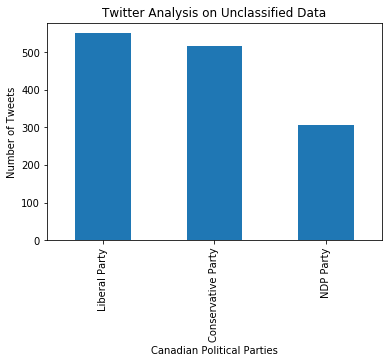

In [9]:
#drawing histogram to count Liberal, conservative and NDP from unclassified file

unclassified_party_df['Party'].value_counts().plot(kind='bar')   
plt.xlabel('Canadian Political Parties')
plt.ylabel('Number of Tweets')
plt.title('Twitter Analysis on Unclassified Data')

In [10]:
# number of tweets in each category (party) in unclassified file
unclassified_party_df['Party'].value_counts()

Liberal Party         551
Conservative Party    517
NDP Party             307
Name: Party, dtype: int64

#### For classified tweets

In [11]:
# Reading Classified Data
class_df = pd.read_csv('classified_tweets.txt', header=0, names=["class1","id","date","query","user","text"])
class_df.head()

,class1,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
# making a pandas dataframe showing parties for tweets in classified file

classified_party_list = []
for i in class_df["text"]:
    classified_party_list.append(party_identifier(i))
    
party_df2 = pd.DataFrame({"Party": classified_party_list})
party_df2 #contains all the Parties in a data frame

classified_party_df = party_df2[party_df2.Party.str.contains("Other Parties") == False]
classified_party_df # contains only Liberal, NDP and Conservative Party

,Party
332,NDP Party
1319,NDP Party
1526,NDP Party
1789,NDP Party
1954,Liberal Party
2400,Conservative Party
2647,NDP Party
2950,NDP Party
3783,NDP Party
4396,Conservative Party


Text(0.5,1,'Twitter Analysis on Classified Data')

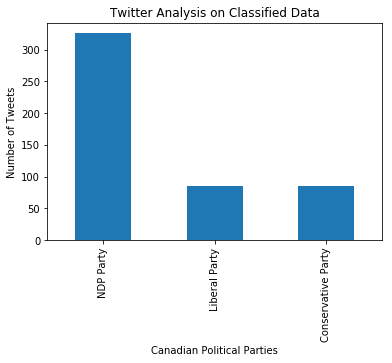

In [13]:
#drawing histogram to count Liberal, conservative and NDP from classified file

classified_party_df['Party'].value_counts().plot(kind='bar')   
plt.xlabel('Canadian Political Parties')
plt.ylabel('Number of Tweets')
plt.title('Twitter Analysis on Classified Data')

In [14]:
# number of tweets in each category (party) in classified file
classified_party_df['Party'].value_counts()

NDP Party             326
Liberal Party          86
Conservative Party     86
Name: Party, dtype: int64

# 3. Model Preparation

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#Convert a collection of tweets to a matrix of token counts

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = data_cleaning,
    lowercase = True,
    stop_words = 'english',
    max_features = 5000      # 5000 unique words chosen for features to perform logistic regression
)

In [16]:
# reading the classified file as a pandas dataframe

class_df = pd.read_csv('classified_tweets.txt', header = 0, names = ["class1", "id", "date", "query", "user", "text"])
class_df.head()   

,class1,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
#reading unclassified as aa pandas dataframe

unclass_df = pd.read_table('unclassified_tweets.txt', header = None, names = ["text"])
unclass_df.head()  

,text
0,living the dream. #cameraman #camera #camerace...
1,justin #trudeau's reasons for thanksgiving. to...
2,@themadape butt…..butt…..we’re allergic to l...
3,2 massive explosions at peace march in #turkey...
4,#mulcair suggests there’s bad blood between hi...


In [18]:
# execute vectorization on classified and unclassified files

corpus_data_features = vectorizer.fit_transform(class_df.text.tolist() + unclass_df.text.tolist())
#corpus_data_features

In [19]:
# convert results to an array
corpus_data_features_nd = corpus_data_features.toarray()
print (corpus_data_features_nd)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [20]:
# showing the features (column names)
vocab = vectorizer.get_feature_names()
print (vocab)

['aaah', 'aah', 'aaron', 'ab', 'abandoned', 'abc', 'ability', 'absolute', 'absolutely', 'abt', 'ac', 'accent', 'accept', 'accepted', 'access', 'accident', 'accidentally', 'accomplished', 'account', 'accounting', 'accounts', 'ace', 'ache', 'aches', 'aching', 'ack', 'acoustic', 'acting', 'action', 'active', 'actor', 'actress', 'actual', 'ad', 'adam', 'add', 'addict', 'addicted', 'addicting', 'addiction', 'addictive', 'adding', 'address', 'admin', 'admire', 'admit', 'adobe', 'adorable', 'adore', 'ads', 'adult', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advice', 'afford', 'afraid', 'africa', 'afternoon', 'age', 'agenda', 'agent', 'ages', 'agh', 'ago', 'agree', 'agreed', 'aha', 'ahah', 'ahaha', 'ahead', 'ahem', 'ahh', 'ahhh', 'ahhhh', 'ahhhhh', 'ahhhhhh', 'ai', 'aid', 'aim', 'ain', 'aint', 'air', 'airport', 'ajax', 'aka', 'ako', 'al', 'alan', 'alancarr', 'alarm', 'alas', 'album', 'albums', 'alcohol', 'alcoholic', 'alert', 'alex', 'alexalltimelow', 'ali', 'alice', 'alie

In [21]:
X = corpus_data_features_nd[0:len(class_df)]    # features for classified portion of overall data
y = class_df.class1                             # targets (sentiment values) for classified portion of overall data
unclassified = corpus_data_features_nd[len(class_df):]   # features for unclassified portion of overall data

In [22]:
from sklearn.cross_validation import train_test_split

#split the features and targets of classified data into training (70%) and test data (30%) sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=0)   

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 4. Model Implementation

In [23]:
# Fit the Logistic Regression classifier to the training data. 

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression() 
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Logistic Regression

In [24]:
# validate the model using test data and show accuracy score
from sklearn.metrics import accuracy_score
y_pred_train = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred_train))

0.738033333333


In [25]:
# Making the Confusion Matrix
# Compute confusion matrix to evaluate the accuracy of a classification
# Thus in binary classification, the count of true negatives is cm{0,0},false negatives is cm{1,0}, 
# true positives is cm{1,1} and false positives is cm{0,1}.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_train)
cm

array([[20776,  9071],
       [ 6647, 23506]])

In [26]:
# train classifier
lg_model = classifier.fit(X_train, y_train)

# make predictions for sentiment values of unclassified tweets based on results from classified tweets
test_pred = lg_model.predict(unclassified)

sentiments=np.array(test_pred)
positive = list(sentiments).count(4)
negative = list(sentiments).count(0)
print('Positive tweets:',positive)
print('Negative tweets:',negative)
    
# print tweets and their sentiment values for unclassified file
for text, class1 in zip(unclass_df.text, test_pred):
    print (class1, text)

Positive tweets: 2312
Negative tweets: 714
0 living the dream. #cameraman #camera #cameraception #camera #cameras #marriott #feet #tommulcair… instagram.com/p/8up9qepkxw/ 
4 justin #trudeau's reasons for thanksgiving. today's montreal@themoment blog at bit.ly/1jqkfwr  #elxn42 poll #quebec #montreal
0 @themadape   butt…..butt…..we’re allergic to latex! makes us sneeze this in #nbpoli #cdnpoli pic.twitter.com/ta0llla4jk
0 2 massive explosions at peace march in #turkey. 30 killed. turkey continues to implode in violence. #cdnpoli twitter.com/telegraph/status/652800836720922624 …
0 #mulcair suggests there’s bad blood between him and #trudeau worldwideherald.com/bammt  #ready4change #ndp pic.twitter.com/zgxmwo2gjk
4 #polqc on se sort de la marde avec #harper et prêt à y retourner avec #trudeau? #polcan
4 harper gave $8m to help other countries' get right wing govt's elected.  boingboing.net/2015/10/09/canadian-tories-funneled-8m-i.html … #cdnpoli #elxn42 @pnpcbc @cbcnews
4 tommy taylor adde

4  pic.twitter.com/aqcopkueg6
4 #elexn42 #cndpoli #lpc vote for change..or old men pulling young man with name recognition strings!!!! #justnotready pic.twitter.com/mlogh5jgvr
4 watch live: ndp leader #tommulcair to speak at rally in
0 @cbcnews this piece may have hurt #stevenharper campaign more than #mikeduffy.  but i don't think he cares.
4 would love to be there! only 12,000 km away, though. #heavesteve #takebackcanada #cdnpoli #michaelharrisrocks twitter.com/harrisauthor/status/652832208298881024 …
4 lynn carleton retweeted fatma othman
4 jon_m_z™ added,
4 welcome refugees: we have no opinion about your barbaric culture. carry on as you will #elxn42 #cdnpoli
4 #mulcair et #trudeau n'avaient pas été pro-#niqab? twitter.com/tehfem/status/653680454646767616 …
4 #justnotready #cdnpoli #elexn42 #elexn2015
0 voted w/my lo!  starting her young; teaching her to exercise democratic right. don't forget oct 19 #elexn42 #cdnpoli pic.twitter.com/u7vtnc0mc9
0 ctvnews.ca/politics/election/pmo-so

0 there's room to reopen the tpp if #thomasmulcair become pm!! getting a rough ride in the us! twitter.com/exposetpp/status/652891408345370625 …
4 hari balaraman retweeted daryl morris
4 talena jacks marti added,
4 oléoducs: en somme, #thomasmulcair a changé d'idée pendant la campagne électorale. des opinions stables. #tlmep #justintrudeau
4 flashrogue added,
4 great day..cast my ballot for #realchange #justintrudeau and am now enjoying watching the jays game 4 #bluejays
4 #realchange and @votechris2015 part of the  @justintrudeau team. get out and vote. hope over fear. #cdnpoli #elxn42
4 #cdnpoli #cdnpoli
4 @theeconomist pm #stevenharper is a disgrace to all canadians for using anti-religion messaging rooted in ignorance to win.
4 #ndp ruled before #liberals (currently in) -#cdnpoli  (see 3)
4 .@standupali would you do this on a first date? #elxn42 twitter.com/pplclimatemvt/status/652963099369058304 …
4 #cdnpoli don't split your anti-harper vote. pick the party that did better in 2011

## 5. Discussion

In [27]:
# Analysis of results
# Showing the parties and corresponding sentiment values for unclassified tweets

len_test_pred = len(test_pred)
sentiment = []
tweets = []
party = []
for i in range(0,len_test_pred):   
    sentiment.append(test_pred[i])
    fun_call=party_identifier(unclass_df.text[i])
    tweets.append(unclass_df.text[i])
    party.append(fun_call)
    
dataframe = pd.DataFrame({"Party": party, "Sentiment": sentiment, "Tweets": tweets })
final = dataframe[dataframe.Party.str.contains("Other") == False]

final.head()  # showing 1st 5 entries of the table

,Party,Sentiment,Tweets
0,NDP Party,0,living the dream. #cameraman #camera #camerace...
1,Liberal Party,4,justin #trudeau's reasons for thanksgiving. to...
4,NDP Party,0,#mulcair suggests there’s bad blood between hi...
6,Conservative Party,4,harper gave $8m to help other countries' get r...
10,Liberal Party,4,icymi: @lylegreg is predicting a @liberal_part...


In [28]:
# Summary of table
final.pivot_table(index='Sentiment', columns='Party', 
                        aggfunc=len, fill_value=0)

Tweets                        
Party     Conservative Party Liberal Party NDP Party
Sentiment                                           
0                        182           106        69
4                        326           435       233

Data Cleaning:

        This part makes our nosiy tweets into better tweets for further explorations. Data Cleaning is also useful for 
        having  higher accuracy.
        
Exploratory Analysis:


        Form this part, we identified form the two graphs that classified tweets have
        NDP Party             326tweets
        Liberal Party          86tweets
        Conservative Party     86tweets
        
        Also, for Unclassified tweets
        Liberal Party         551
        Conservative Party    517
        NDP Party             307
        
Model Prepartaion and Model Implementation:


        The above table shows, Each parties positive and Negative sentiments
        0 = Negative
        4 = Positive
        
        Sum of sentiments for all parties is 1351
        Conservative Party total = 508, Postive = 326, Negative = 182
        Liberal Party total = 541, Positive = 435, Negative = 106
        NDP Party total = 302, Positive = 233, Negative = 69
        
        Based on the Sentimental Analysis form the above table, Conservative party has 37.60%, Liberal Party has 40.04% and 
        NDP Party has 22.35%
        
        Postive Talking & Negative Talking:
        Conservative Party = 64.17% & 35.82%
        Liberal Party = 80.40% & 19.59%
        NDP Party = 77.15% & 22.84%
        
        By seeing the above values, we can assure that Liberal Party is winning the Canadian Political Elections 2015 based 
        on the Sentimental Analysis of the given tweets. In Reality Liberal Party won the election, Hence Our sentimental
        analysis of the tweets are correct.
        
        

##  BONUS

### Naive Bayes

In [29]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)


GaussianNB(priors=None)

In [30]:
# validate the model using test data and show accuracy score
from sklearn.metrics import accuracy_score
y_pred_train_NB = classifier1.predict(X_test)
print(accuracy_score(y_test, y_pred_train_NB))

0.67475


In [31]:
# Making the Confusion Matrix
# Compute confusion matrix to evaluate the accuracy of a classification
# Thus in binary classification, the count of true negatives is cm{0,0},false negatives is cm{1,0}, 
# true positives is cm{1,1} and false positives is cm{0,1}.
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred_train_NB)
cm_NB

array([[17570, 12277],
       [ 7238, 22915]])

In [32]:
# train classifier
NB_model = classifier1.fit(X_train, y_train)

# make predictions for sentiment values of unclassified tweets based on results from classified tweets
test_pred_NB = NB_model.predict(unclassified)

sentiments=np.array(test_pred_NB)
positive = list(sentiments).count(4)
negative = list(sentiments).count(0)
print('Positive tweets:',positive)
print('Negative tweets:',negative)
    
# print tweets and their sentiment values for unclassified file
for text, class1 in zip(unclass_df.text, test_pred_NB):
    print (class1, text)

Positive tweets: 2286
Negative tweets: 740
4 living the dream. #cameraman #camera #cameraception #camera #cameras #marriott #feet #tommulcair… instagram.com/p/8up9qepkxw/ 
4 justin #trudeau's reasons for thanksgiving. today's montreal@themoment blog at bit.ly/1jqkfwr  #elxn42 poll #quebec #montreal
4 @themadape   butt…..butt…..we’re allergic to latex! makes us sneeze this in #nbpoli #cdnpoli pic.twitter.com/ta0llla4jk
4 2 massive explosions at peace march in #turkey. 30 killed. turkey continues to implode in violence. #cdnpoli twitter.com/telegraph/status/652800836720922624 …
4 #mulcair suggests there’s bad blood between him and #trudeau worldwideherald.com/bammt  #ready4change #ndp pic.twitter.com/zgxmwo2gjk
0 #polqc on se sort de la marde avec #harper et prêt à y retourner avec #trudeau? #polcan
0 harper gave $8m to help other countries' get right wing govt's elected.  boingboing.net/2015/10/09/canadian-tories-funneled-8m-i.html … #cdnpoli #elxn42 @pnpcbc @cbcnews
0 tommy taylor adde

4 #hallcountydemocrats #turngeorgiablue #youngdemocrats #liberal #votedemocrat @ hall county democratic… instagram.com/p/8wtjwqkurt/ 
4 thomas #mulcair on #tpp: #ndp leader says he's only one to get better deal jenke.rs/f4j9fc  pic.twitter.com/ey3gjsjkct
4 i consider myself a classical #liberal...democrats are taking us...over the financial cliff...and the republicans  twitter.com/cbssunday/status/653207652168826880 …
4 liberals gain advantage as election enters holiday weekend bit.ly/1nhekyq  (via @ctvnews) #cdnpoli #elxn42
0 @crafty60 it really doesn't matter who wins the #elxn42 #cdnpoli bnn.ca/video/player.aspx?vid=724225 … …
0 no. that's not real. i refuse to believe #cpc thinks canadians are that stupid &amp; xenophobic. @shamusbrown1 @suepeac
0 watch live: ndp leader #tommulcair to speak at rally in courtenay, b.c. glbn.ca/th5t6  #elxn42 #cdnpoli
4 considering abandoning fb until after the election. at least novice political opinions on twitter are short. #justnotready #editfolk

4 via @nytimes
4 #pressrelease: 10star.oska's message to the #primeminister!:… instagram.com/p/8wbu-6ksye/ 
4 volatility in quebec rare sign vote could be shared among three or more… worldwideherald.com/i5s7p  #cdnpoli #elxn42 pic.twitter.com/suw68elrfq
0 #cpc
4 #prolife
4 torontonian retweeted wheres the democracy
4 #lpc #peipoli #cdnpoli #elxn42 pic.twitter.com/7tphvq8qwo
4 #canadians are blinded by their own benevolence to believe the world is all peaceful. time to wake up? #cdnpoli tsecnetwork.ca/2015/10/09/has-the-liberal-party-of-canada-been-infiltrated-by-extremist-candidates/ …
0 @justintrudeau promised potable water to 95 communities in 5 years. a lie. there is no costed plan. 150 years of #lpc and #cpc got us here.
0 nuff said. #vote #election #federal #2015 #stopharper2015 #tommulcairforpm #tommulcair #ndp harper's… instagram.com/p/8uidw3qfs2/ 
4 #pantsonfire
4 @csmithpoli @brentrathgeber the polling in that riding is probably not asking the right question. they are asking a

4 .@gsawision so after 10 years of harpercon rule you are advocating change and supporting the libs and/or npd. good to know. #cdnpoli #elxn42
4 accidental academic retweeted armine yalnizyan
4 pour que le québec ne soit plus dans les bancs d'oppostion #polcan #elxn42 #cdnpoli plus.lapresse.ca/screens/67690aa2-5e44-4e37-84c2-2900008d7038%7c_0.html …
4 #mulcair says he would keep #harper's child care benefits ottawacitizen.com/news/politics/mulcair-says-ndp-government-would-keep-tory-child-care-benefits/ …. #uccb money 2 millionaires pic.twitter.com/dphsdpw9zo
4 no #cpc in #qcpoli! #quebec "@cbcnews: lac-mégantic residents march for better rail safety cbc.ca/1.3266703  pic.twitter.com/0nyv45grwy"
4 chelsey harasym retweeted huffpost canada
4 evangelist franklin graham: islamic state guilty of ‘genocide’ against christians - tinyurl.com/nqpwa9c  #tcot #conservative
4 #mulcair said it himself,if your on the island your vote is green!subconsciously he knows emay w a team will help #cdnpoli

###  Decision Tree Classifier

In [33]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
# criterion is a function to measure the quality of split and 'entropy' for information gain
classifier3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [34]:
# validate the model using test data and show accuracy score
from sklearn.metrics import accuracy_score
y_pred_train_DTC = classifier3.predict(X_test)
print(accuracy_score(y_test, y_pred_train_DTC))

0.680333333333


In [35]:
# Making the Confusion Matrix
# Compute confusion matrix to evaluate the accuracy of a classification
# Thus in binary classification, the count of true negatives is cm{0,0},false negatives is cm{1,0}, 
# true positives is cm{1,1} and false positives is cm{0,1}.
from sklearn.metrics import confusion_matrix
cm_DTC = confusion_matrix(y_test, y_pred_train_DTC)
cm_DTC

array([[20559,  9288],
       [ 9892, 20261]])

In [36]:
# train classifier
DTC_model = classifier3.fit(X_train, y_train)

# make predictions for sentiment values of unclassified tweets based on results from classified tweets
test_pred_DTC = DTC_model.predict(unclassified)

sentiments=np.array(test_pred_DTC)
positive = list(sentiments).count(4)
negative = list(sentiments).count(0)
print('Positive tweets:',positive)
print('Negative tweets:',negative)
    
# print tweets and their sentiment values for unclassified file
for text, class1 in zip(unclass_df.text, test_pred_DTC):
    print (class1, text)

Positive tweets: 2023
Negative tweets: 1003
4 living the dream. #cameraman #camera #cameraception #camera #cameras #marriott #feet #tommulcair… instagram.com/p/8up9qepkxw/ 
4 justin #trudeau's reasons for thanksgiving. today's montreal@themoment blog at bit.ly/1jqkfwr  #elxn42 poll #quebec #montreal
0 @themadape   butt…..butt…..we’re allergic to latex! makes us sneeze this in #nbpoli #cdnpoli pic.twitter.com/ta0llla4jk
0 2 massive explosions at peace march in #turkey. 30 killed. turkey continues to implode in violence. #cdnpoli twitter.com/telegraph/status/652800836720922624 …
0 #mulcair suggests there’s bad blood between him and #trudeau worldwideherald.com/bammt  #ready4change #ndp pic.twitter.com/zgxmwo2gjk
0 #polqc on se sort de la marde avec #harper et prêt à y retourner avec #trudeau? #polcan
4 harper gave $8m to help other countries' get right wing govt's elected.  boingboing.net/2015/10/09/canadian-tories-funneled-8m-i.html … #cdnpoli #elxn42 @pnpcbc @cbcnews
0 tommy taylor add

4 but he's #justnotready.... #nicehairthough twitter.com/allisoooonf/status/653770430663102464 …
4 for #primeminister @narendramodi dinner #24th sept #nyc #trillionaires club colorfully delicious… instagram.com/p/8ty0sojd4p/ 
4 do you know how you fit in canada's political landscape? ow.ly/tfdby  #cdnpoli #canada #electionscanada
4 andrew penner added,
0 #evanassif2015 #Équipetrudeau #vimy #changerensemble #libéral #elxn42 fb.me/m65igg1q 
4 #modibestpm
0 @globebc @globeandmail yes, the right ones (who vote #conservative) and the wrong ones (everyone else).
4 #cdnpoli #poetry
4 @joanne_hussey  love it! carrots very #ndp
4 #elxn42 #trudeau great guy? turns out - not so much. twitter.com/torybluest/status/653308026791833600 …
4 #cdnpoli check your riding results for 2011. vote for the party that can bring down the harper regime.
4 the niqabi citizen who keeps talking abt 'elections' in #canada &amp; connections w/ #icna &amp; #jamateislami
0 less than 2 weeks from #elxn42 and this is how 

4 really? is this the level to which you must stoop to get a #lpc vote? do you know how idiotic this makes you look?  twitter.com/liberal_party/status/653700900469370880 …
0 贾斯汀. 杜魯多想要關閉超級簽證項目 elaineallan.com/justin_trudeau_will_shut_down_super_visa_program?recruiter_id=102621 … #elxn42 #cpc #cndpoli
0 bergdahl travesty #mayday4usa #tcot #ccot #teaparty #conservative ΜΟΛΩΝ ΛΑΒΕ pic.twitter.com/mujpnab7p1
4 9 ways the harper cons have shown how little they care about women #2 #cpc #elxn42 #cdnpoli pressprogress.ca/9_ways_conservatives_have_shown_how_little_they_care_about_women … pic.twitter.com/h4s877kmcm
4 rt #lpc candidate @kyleharrietha celebrates thanksgiving by advance voting: kyleharrietha.liberal.ca/liberal-candidate-kyle-harrietha-celebrates-thanksgiving-by-advance-voting/ … #ymm #coldlake pic.twitter.com/j9cvibce8k
4 one week to #elxn42! today's thought: if you aren't voting, you are voting for harper! register today! #heavesteve, #tm4pm, #ndp
4 cs added,
4 t.thestar.com/#/art

4 add this video to your website by copying the code below. learn more
4 pic.twitter.com/xomvmq49hg
4 #conservative tactics like deception is admired #cpc #cdnpoli
0 promisedlanding: promisedlanding: ruth_blane: crowebar_67: rt vegasgop: #jebbush staffer posing as #liberal #feminazi to trump: "i dont thi…
4 rt @althiaraj get to know @thomasmulcair in 51 questions #elxn42 #cdnpoli huffingtonpost.ca/2015/10/10/thomas-mulcair-questions_n_8270934.html … via @huffpostcanada
4 #southafrica files case against 
0 #cndpoli #elxn42 don't give away your vote to someone else, don't vote #c51 or #tpp, have integrity in what you believe. unlike justin #lpc
4 squiddog and rob is live from #denver! #talkradio #news #conservative party934.com  tune in now! ow.ly/i/7m2bm 
0 @pmharper gave 8 million dollars of taxpayer money to the international republican institute . yikes! #cdnpoli
0 @justintrudeau i won't let you take away @reidpats_23 job. #fuckrenewableenergy #rigs #oil #jussyaintready #justnotready

######  For Bonus part, I am trying different classification model and comparing the acuuracy with Logistic Regression model

For Logistic Regression Model:


        The Acuuracy is 73.8%
        By prediction, the unclassified tweets have 
        Positive tweets: 2312
        Negative tweets: 714

For Naive Bayes Model:

        The Acuuracy is 67.475%
        By prediction, the unclassified tweets have 
        Positive tweets: 2286
        Negative tweets: 740

For Decision Tree Classification Model:

        The Acuuracy is 68.03%
        By prediction, the unclassified tweets have 
        Positive tweets: 2023
        Negative tweets: 1003
        
        

I also tried for K-NN model and SVM model, but it takes so much time to train and predict the output. So I dropped those two models.



By Comparing all these models Logistic Regression has higher accuracy



Pros each Model:


Logistic Regression Model:

        Probabilistic approach, gives informations about statistical significance of features

Naive Bayes Model:

        Efficient, not biased by outliers, works on nonlinear problems, probabilistic approach

Decision Tree Classification Model:

        Interpretability, no need for feature scaling, works on both linear / nonlinear problems

Cons each Model:



Logistic Regression Model:

        The Logistic Regression Assumptions like linearity, normality, homoscedasticity etc

Naive Bayes Model:

        Based on the assumption that features have same statistical relevance

Decision Tree Classification Model:

        Poor results on too small datasets, overfitting can easily occur